In [1]:
import numpy as np
import RingAttractorModel

WARNING    /home/pajucg/.conda/envs/comphys/lib/python3.12/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
 [py.warnings]


08:11:04 : 1 min 20.0 sec -> eval end


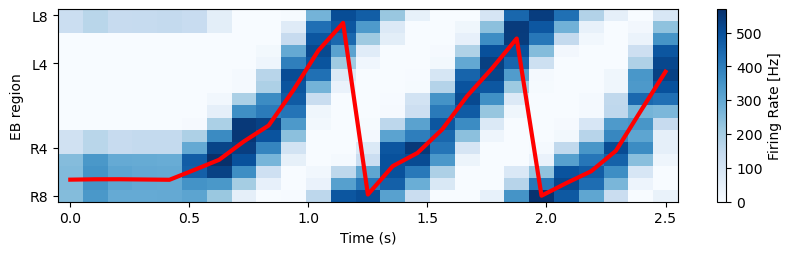

In [2]:
parameters = {'w_EE': 0.719, 'w_EI': 0.143, 'w_IE': 0.74, 'w_II': 0.01, 'w_EP': 0.012, 'w_PE': 0.709, 'w_PP': 0.01}
p = RingAttractorModel.Parameters(**parameters)

r = RingAttractorModel.Simulator(parameters=p)
r.run(t_epg_open=200,
      t_epg_close=300,
      t_pen_open=2000,
      stimulus_strength=0.05,
      stimulus_location=np.deg2rad(0),
      shifter_strength=0.015,
      half_PEN='right')
r.plot()

In [3]:
r2 = RingAttractorModel.Simulator(parameters=p)
r2.run(t_epg_open=200,
      t_epg_close=300,
      t_pen_open=2000,
      stimulus_strength=0.05,
      stimulus_location=np.deg2rad(0),
      shifter_strength=0.016,
      half_PEN='right')


08:13:51 : 1 min 22.4 sec -> eval end


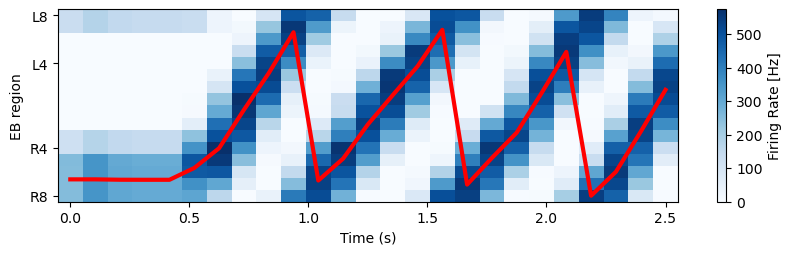

In [4]:
r2.plot()